In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
df = pd.read_excel("Coffee Shop Sales.xlsx")
df.head()

,Unnamed: 0,Unnamed: 1
0,NaN,NaN
1,Row Labels,Sum of Revenue
2,Jan,81677.74
3,Feb,76145.19
4,Mar,98834.68


In [3]:
pd.ExcelFile("Coffee Shop Sales.xlsx").sheet_names

['Pivot Tables', 'Dashboard', 'Transactions']

In [6]:
df = pd.read_excel("Coffee Shop Sales.xlsx", sheet_name="Transactions")

df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Revenue,Month,Month.1,Weekday,Weekday.1,Hour
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,1,Jan,7,Sun,7
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,1,Jan,7,Sun,7
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,1,Jan,7,Sun,7
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,1,Jan,7,Sun,7
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,1,Jan,7,Sun,7


In [7]:
df.shape
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
 11  Revenue           149116 non-null  float64       
 12  Month             149116 non-null  int64         
 13  Month.1           149116 non-null  object        
 14  Week

In [8]:
df_test = pd.read_excel(
    "Coffee Shop Sales.xlsx",
    sheet_name="Transactions",
    nrows=5,
    engine="openpyxl"
)
df_test

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Revenue,Month,Month.1,Weekday,Weekday.1,Hour
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,1,Jan,7,Sun,7
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,1,Jan,7,Sun,7
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,1,Jan,7,Sun,7
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,1,Jan,7,Sun,7
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,1,Jan,7,Sun,7


In [9]:
print(df.shape)
print(df.columns)
df.info()

(149116, 17)
Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail',
       'Revenue', 'Month', 'Month.1', 'Weekday', 'Weekday.1', 'Hour'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  

In [10]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.columns

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail',
       'revenue', 'month', 'month.1', 'weekday', 'weekday.1', 'hour'],
      dtype='object')

In [11]:
drop_cols = [c for c in df.columns if c.endswith(".1") or c.startswith("unnamed")]
print(drop_cols)
df = df.drop(columns=drop_cols)
print(df.shape)

['month.1', 'weekday.1']
(149116, 15)


In [12]:
print("Duplicates:", df.duplicated().sum())
print("\nNull counts (top 10):")
print(df.isna().sum().sort_values(ascending=False).head(10))

print("\nBad values:")
print("qty<=0:", (df["transaction_qty"] <= 0).sum())
print("unit_price<=0:", (df["unit_price"] <= 0).sum())
print("revenue<0:", (df["revenue"] < 0).sum())

Duplicates: 0

Null counts (top 10):
transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
dtype: int64

Bad values:
qty<=0: 0
unit_price<=0: 0
revenue<0: 0


In [13]:
df["date"] = df["transaction_date"].dt.date
df["weekday_name"] = df["transaction_date"].dt.day_name()
df["month"] = df["transaction_date"].dt.to_period("M").astype(str)

In [14]:
daily = df.groupby("date", as_index=False)["revenue"].sum()
daily.head()

,date,revenue
0,2023-01-01,2508.20
1,2023-01-02,2403.35
2,2023-01-03,2565.00
3,2023-01-04,2220.10
4,2023-01-05,2418.85


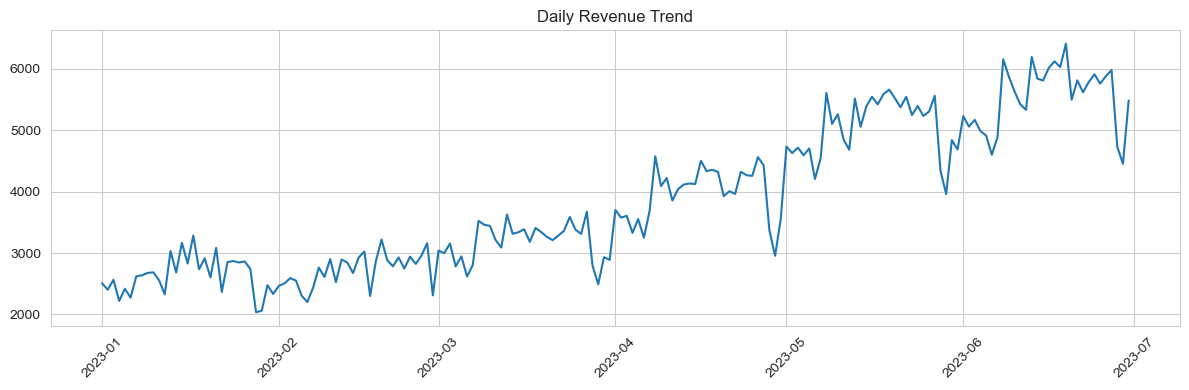

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(daily["date"], daily["revenue"])
plt.xticks(rotation=45)
plt.title("Daily Revenue Trend")
plt.tight_layout()
plt.show()

In [16]:
monthly = df.groupby("month", as_index=False)["revenue"].sum()
monthly

,month,revenue
0,2023-01,81677.74
1,2023-02,76145.19
2,2023-03,98834.68
3,2023-04,118941.08
4,2023-05,156727.76
5,2023-06,166485.88


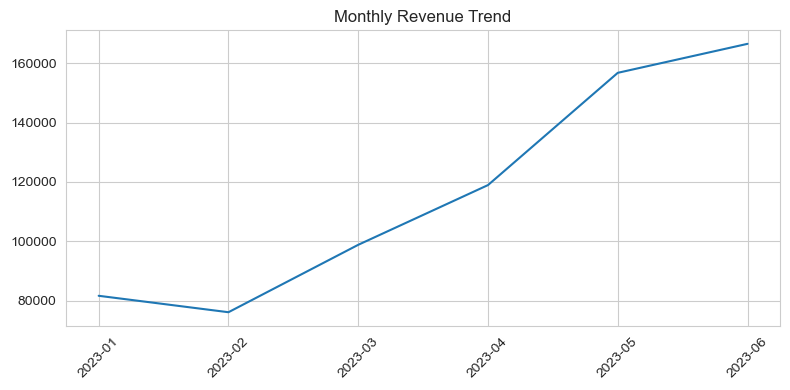

In [17]:
plt.figure(figsize=(8,4))
plt.plot(monthly["month"], monthly["revenue"])
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.tight_layout()
plt.show()

In [18]:
monthly["growth_%"] = monthly["revenue"].pct_change() * 100
monthly

,month,revenue,growth_%
0,2023-01,81677.74,NaN
1,2023-02,76145.19,-6.773633
2,2023-03,98834.68,29.797667
3,2023-04,118941.08,20.343466
4,2023-05,156727.76,31.769242
5,2023-06,166485.88,6.226159


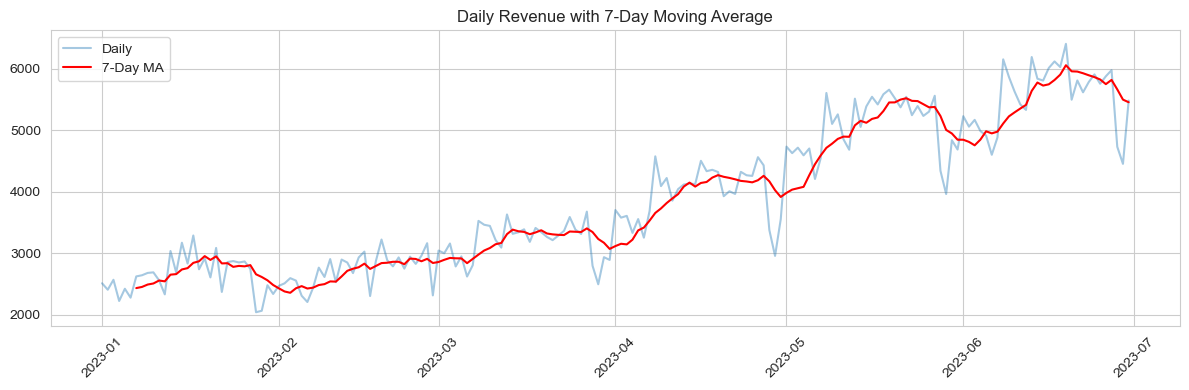

In [19]:
daily["ma_7"] = daily["revenue"].rolling(7).mean()

plt.figure(figsize=(12,4))
plt.plot(daily["date"], daily["revenue"], alpha=0.4, label="Daily")
plt.plot(daily["date"], daily["ma_7"], color="red", label="7-Day MA")
plt.legend()
plt.xticks(rotation=45)
plt.title("Daily Revenue with 7-Day Moving Average")
plt.tight_layout()
plt.show()

In [20]:
weekday_rev = df.groupby("weekday_name", as_index=False)["revenue"].mean()
weekday_rev = weekday_rev.sort_values("revenue", ascending=False)
weekday_rev

,weekday_name,revenue
2,Saturday,4.724255
6,Wednesday,4.707346
1,Monday,4.697929
5,Tuesday,4.690875
0,Friday,4.671352
3,Sunday,4.661088
4,Thursday,4.653541


In [21]:
cat = df.groupby("product_category", as_index=False)["revenue"].sum()
cat = cat.sort_values("revenue", ascending=False)
cat["share_%"] = cat["revenue"] / cat["revenue"].sum() * 100
cat

,product_category,revenue,share_%
2,Coffee,269952.45,38.630178
8,Tea,196405.95,28.105679
0,Bakery,82315.64,11.779363
4,Drinking Chocolate,72416.00,10.362725
3,Coffee beans,40085.25,5.736197
1,Branded,13607.00,1.947161
6,Loose Tea,11213.60,1.604665
5,Flavours,8408.80,1.203299
7,Packaged Chocolate,4407.64,0.630733


In [22]:
cat_month = df.groupby(["month", "product_category"], as_index=False)["revenue"].sum()
cat_month_pivot = cat_month.pivot(index="month", columns="product_category", values="revenue")
cat_month_pivot

product_category,Bakery,Branded,Coffee,Coffee beans,Drinking Chocolate,Flavours,Loose Tea,Packaged Chocolate,Tea
month,,,,,,,,,
2023-01,9535.75,1890.0,31256.85,5245.25,8337.75,974.4,1293.85,521.94,22621.95
2023-02,9038.82,1235.0,29268.95,4077.50,8132.25,930.4,1277.85,451.02,21733.40
2023-03,11902.58,1801.0,38303.60,5256.20,10253.50,1172.0,1646.95,588.20,27910.65
2023-04,14021.70,2379.0,45971.20,6824.70,12266.75,1418.4,1829.15,873.23,33356.95
2023-05,18565.52,2889.0,60362.85,8768.95,16319.75,1905.6,2395.15,981.09,44539.85
2023-06,19251.27,3413.0,64789.00,9912.65,17106.00,2008.0,2770.65,992.16,46243.15


In [23]:
cat_growth = cat_month_pivot.pct_change() * 100
cat_growth

product_category,Bakery,Branded,Coffee,Coffee beans,Drinking Chocolate,Flavours,Loose Tea,Packaged Chocolate,Tea
month,,,,,,,,,
2023-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02,-5.211231,-34.656085,-6.359886,-22.263000,-2.464694,-4.515599,-1.236619,-13.587769,-3.927822
2023-03,31.682897,45.829960,30.867694,28.907419,26.084417,25.967326,28.884454,30.415503,28.422842
2023-04,17.803871,32.093282,20.017962,29.840950,19.634759,21.023891,11.062874,48.458007,19.513340
2023-05,32.405628,21.437579,31.305796,28.488432,33.040536,34.348562,30.943334,12.351843,33.524948
2023-06,3.693675,18.137764,7.332573,13.042611,4.817782,5.373636,15.677515,1.128337,3.824216


In [24]:
volume_month = df.groupby("month", as_index=False)["transaction_qty"].sum()
price_month = df.groupby("month", as_index=False)["unit_price"].mean()

volume_month
price_month

,month,unit_price
0,2023-01,3.408689
1,2023-02,3.370276
2,2023-03,3.383724
3,2023-04,3.383050
4,2023-05,3.372712
5,2023-06,3.382300


In [25]:
volume_month["vol_growth_%"] = volume_month["transaction_qty"].pct_change() * 100
price_month["price_growth_%"] = price_month["unit_price"].pct_change() * 100

volume_month
price_month

,month,unit_price,price_growth_%
0,2023-01,3.408689,NaN
1,2023-02,3.370276,-1.126921
2,2023-03,3.383724,0.399032
3,2023-04,3.383050,-0.019914
4,2023-05,3.372712,-0.305596
5,2023-06,3.382300,0.284295


In [26]:
volume_month

,month,transaction_qty,vol_growth_%
0,2023-01,24870,NaN
1,2023-02,23550,-5.307600
2,2023-03,30406,29.112527
3,2023-04,36469,19.940143
4,2023-05,48233,32.257534
5,2023-06,50942,5.616487


In [27]:
store_month = df.groupby(["month", "store_location"], as_index=False)["revenue"].sum()
store_pivot = store_month.pivot(index="month", columns="store_location", values="revenue")
store_pivot

store_location,Astoria,Hell's Kitchen,Lower Manhattan
month,,,
2023-01,27313.66,27820.65,26543.43
2023-02,25105.34,25719.80,25320.05
2023-03,32835.43,33110.57,32888.68
2023-04,39477.61,40304.14,39159.33
2023-05,52428.76,52598.93,51700.07
2023-06,55083.11,56957.08,54445.69


In [28]:
store_growth = store_pivot.pct_change() * 100
store_growth

store_location,Astoria,Hell's Kitchen,Lower Manhattan
month,,,
2023-01,NaN,NaN,NaN
2023-02,-8.085039,-7.551405,-4.608975
2023-03,30.790621,28.735721,29.891845
2023-04,20.228698,21.725902,19.066287
2023-05,32.806317,30.505030,32.024910
2023-06,5.062775,8.285625,5.310670


In [29]:
hour_rev = df.groupby("hour", as_index=False)["revenue"].sum()
hour_rev.sort_values("revenue", ascending=False)

,hour,revenue
4,10,88673.39
3,9,85169.53
2,8,82699.87
1,7,63526.47
5,11,46319.14
9,15,41733.10
8,14,41304.74
10,16,41122.75
7,13,40367.45
6,12,40192.79


In [30]:
df.groupby(["transaction_id", "product_category"]).size()

transaction_id  product_category  
1               Coffee                1
2               Tea                   1
3               Drinking Chocolate    1
4               Coffee                1
5               Tea                   1
                                     ..
149452          Tea                   1
149453          Tea                   1
149454          Tea                   1
149455          Coffee                1
149456          Flavours              1
Length: 149116, dtype: int64